In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
import matplotlib as plt


In [2]:
dados = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dados.shape

(299, 13)

In [3]:
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:>

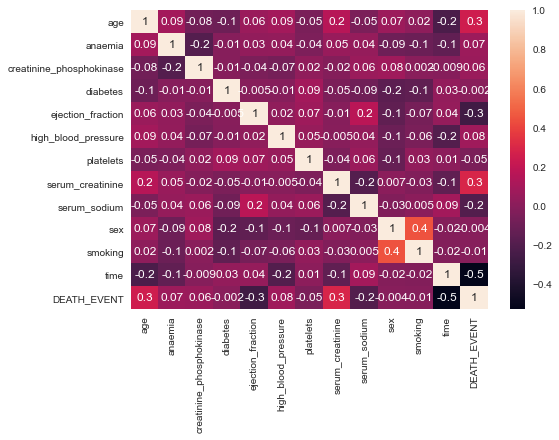

In [4]:

srn.heatmap(dados.corr(), annot=True, fmt='.1g')

In [5]:
dados.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
dados = dados.drop(columns=['time'])
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [27]:
previsores = dados.iloc[:,0:11].values
classe = dados.iloc[:,11].values

In [76]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                   classe,
                                                                   test_size = 0.3,
                                                                   random_state = 2)

In [83]:
svm = SVC()
svm.fit(x_treinamento, y_treinamento)

SVC()

In [84]:
previsoes = svm.predict(x_teste)

In [85]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7333333333333333

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
forest = ExtraTreesClassifier()
forest.fit(x_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.13721906, 0.03438337, 0.11927134, 0.04655506, 0.17657041,
       0.03737007, 0.104715  , 0.1505783 , 0.12738961, 0.03371536,
       0.03223243])

In [88]:
x_treinamento2 = x_treinamento[:,[0,1,2,3]]
x_teste2 = x_teste[:,[0,1,2,3]]

In [89]:
svm2 = SVC()
svm2.fit(x_treinamento2, y_treinamento)
previsoes2 = svm2.predict(x_teste2)
taxa_acerto = accuracy_score(y_teste, previsoes2)
taxa_acerto

0.7111111111111111

In [9]:
#Naive Bayes

In [77]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB()

In [78]:
previsoes = naive_bayes.predict(x_teste)

In [79]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[63,  3],
       [17,  7]], dtype=int64)

In [80]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1-taxa_acerto
taxa_acerto

0.7777777777777778

<AxesSubplot:>

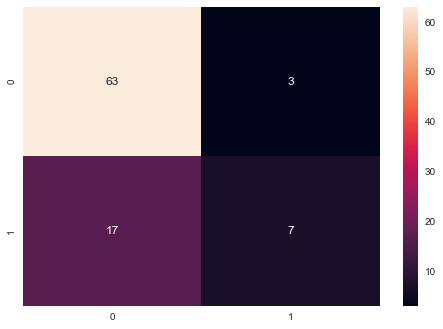

In [81]:
srn.heatmap(confusao, annot=True, )

In [82]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        66
           1       0.70      0.29      0.41        24

    accuracy                           0.78        90
   macro avg       0.74      0.62      0.64        90
weighted avg       0.76      0.78      0.74        90



In [49]:
#Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [50]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier()

In [51]:
export_graphviz(arvore, out_file = 'tree.dot')

In [52]:
previsoes = arvore.predict(x_teste)
previsoes

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [53]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[47, 19],
       [10, 14]], dtype=int64)

In [54]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.6777777777777778

In [55]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.3222222222222222

In [56]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        66
           1       0.42      0.58      0.49        24

    accuracy                           0.68        90
   macro avg       0.62      0.65      0.63        90
weighted avg       0.72      0.68      0.69        90



<AxesSubplot:>

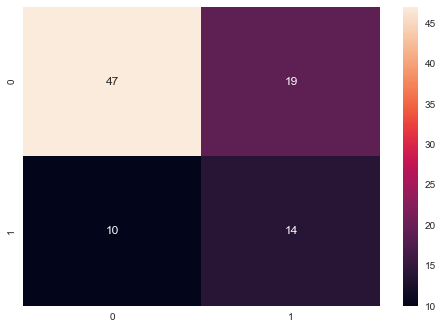

In [57]:
srn.heatmap(confusao, annot=True)